# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Gi-E Thang

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TODO: Import dataset and inspect the first five columns
data = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
# Separate the data into feature matrix (X) and target vector (y)
X = data.iloc[:, :-1]  # Features are all columns except the last one
y = data.iloc[:, -1]   # Target is the last column

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*
I would select StandardScaler because 

1.Varying Scales of Features:


The dataset contains different measurements (features) related to wheat kernels, and these measurements may have different units and scales.
For example, features like area, length, and width may have different ranges of values.
PCA is sensitive to the scale of the features, so it's essential to standardize them to have zero mean and unit variance.

2. PCA Assumption:

Principal Component Analysis (PCA) assumes that the features are centered (zero mean) and have the same scale.
Standardizing the features with StandardScaler ensures that this assumption is met, allowing PCA to perform effectively.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [5]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a variable called 'data'
# X contains the features, and y contains the target variable
X = data.iloc[:, :-1]  # Assuming the target variable is in the last column
y = data.iloc[:, -1]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# TODO: Print the shape of the training feature matrix and target vector
# Assuming you have split your data into X_train and y_train
print("Shape of the training feature matrix (X_train):", X_train.shape)
print("Shape of the training target vector (y_train):", y_train.shape)

Shape of the training feature matrix (X_train): (168, 7)
Shape of the training target vector (y_train): (168,)


Now that we have our training data, we can implement our selected scaler.

In [7]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Print a few rows of the scaled data to check
print("Scaled Training Data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Scaled Training Data:
          0         1         2         3         4         5         6
0 -1.053856 -1.040832 -0.888808 -0.861746 -1.130186  1.035482 -0.223421
1  1.529271  1.549570  0.463557  1.608780  1.462880 -0.126599  1.690317
2 -0.863920 -0.878932 -0.409757 -0.962584 -0.731870  1.222849 -0.761981
3 -0.176698 -0.146527  0.086251 -0.160465 -0.293454 -1.488222 -0.237810
4 -1.223071 -1.318376 -0.464869 -1.343017 -1.106127 -0.214533 -0.848315


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [8]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [12]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the cross-validation score of the best estimator
print("Cross-validation Score:", grid_search.best_score_)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the test set
test_score = grid_search.best_estimator_.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross-validation Score: 0.9467023172905525
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [13]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [15]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

# Apply PCA to the scaled test data for plotting
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Create a DataFrame with PCA components and predicted labels
pca_df = pd.DataFrame({'PC1': X_test_pca[:, 0], 'PC2': X_test_pca[:, 1], 'Class': y_pred})

# Print the first few rows of the DataFrame for verification
print("PCA DataFrame:")
print(pca_df.head())

PCA DataFrame:
        PC1       PC2  Class
0 -0.990147  1.723206      1
1 -2.756666 -0.415260      3
2  3.703892 -0.304353      2
3 -1.404692  1.643833      1
4 -2.668375  1.298960      1


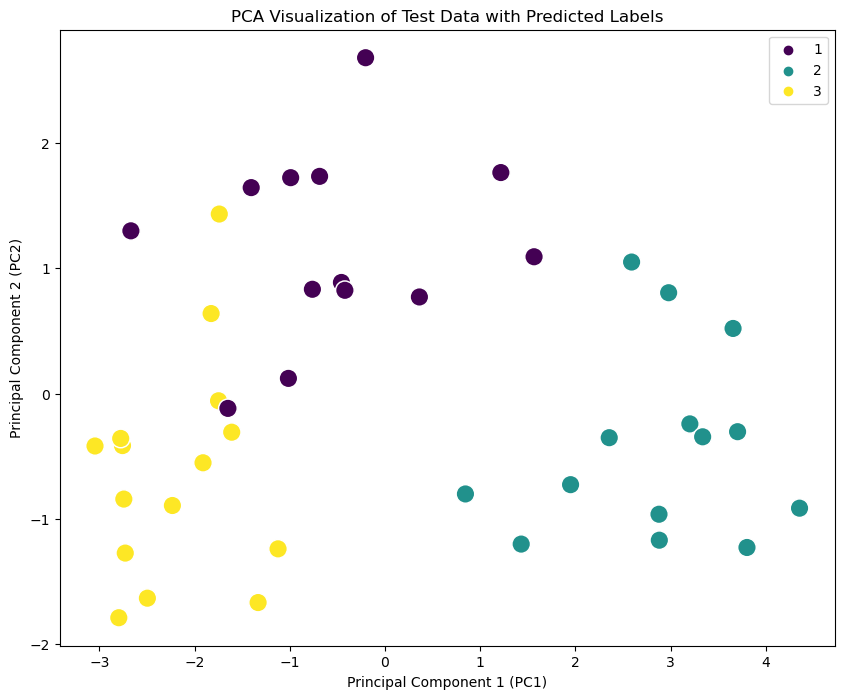

In [36]:

# TODO: Plot test points colored by predicted label
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis', s=180)
plt.title('PCA Visualization of Test Data with Predicted Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
Logistic Regression Model Performance:

The cross-validation score of approximately 94.67% suggests that the model performed well during cross-validation on the training data.
The test score of approximately 95.24% indicates a high accuracy on the test set, further supporting the good performance of the model.
Overall, the high cross-validation and test scores suggest that the logistic regression model, with the specified hyperparameters (C=10.0, fit_intercept=True), is effective for the given dataset.

PCA and Its Relation to Model Results:

The PCA visualization, as mentioned earlier, allows you to observe how well the model has separated the classes in the reduced-dimensional space.
Given the high accuracy scores, you would expect the PCA visualization to show distinct clusters for each class, indicating that the model was successful in distinguishing between the classes.
You can interpret the PCA results in conjunction with the model scores to gain insights into the separation and distribution of classes in the reduced-dimensional space.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


*DESCRIBE YOUR PROCESS HERE*
1. I looked the previous assignments, labs and lectures to generate the code.

2.
Importing necessary libraries (numpy, pandas, matplotlib, seaborn, sklearn, etc.)
Loading the dataset ('seeds_dataset.txt') and inspecting the first few rows.
Separating the data into features and target, followed by splitting into training and testing sets.
Scaling the data using StandardScaler.
Instantiating a logistic regression model.
Performing a grid search to find the best hyperparameters.
Printing the best parameters, cross-validation score, and test score.
Predicting labels on the test data using the best estimator.
Reducing the dimensions of the test data using PCA.
Plotting the test points colored by the predicted label.

3. I didnt use AI.

4. A challange I faced would be to choose which scaler to use for preprocessing, but after some research i was able to find out that standardscaler was the best process for this scenerio. Other than that it was pretyy straight forward.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [18]:
# TODO: Scale feature matrix
from sklearn.cluster import KMeans
# Replace 'seeds_dataset.txt' with the actual file path
file_path = 'seeds_dataset.txt'

# Load data from the text file into a NumPy array
original_data = np.loadtxt(file_path)

# Display the first 5 rows for verification
print("Original Data (First 5 rows):\n", original_data[:5, :])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_data)

Original Data (First 5 rows):
 [[15.26   14.84    0.871   5.763   3.312   2.221   5.22    1.    ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956   1.    ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825   1.    ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805   1.    ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175   1.    ]]


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

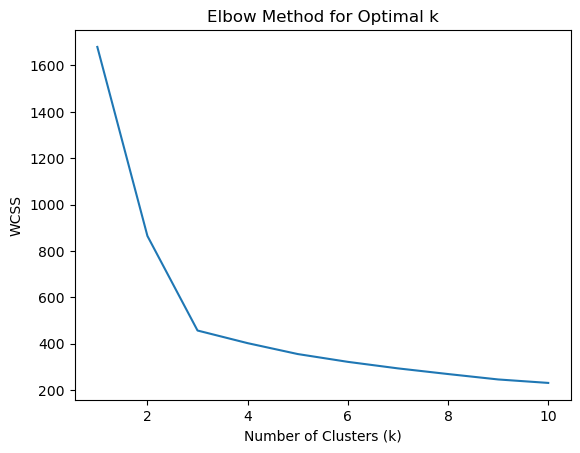

In [19]:
# TODO: Use the elbow method to determine the optimal number of clusters
import matplotlib.pyplot as plt
# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

# Assuming you have scaled data in the variable 'scaled_data'
# You might need to adjust this depending on your variable names
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# TODO: Implement K-means with the number of clusters determined in the previous step

# Assuming you found the optimal number of clusters (replace 'optimal_k' with your value)
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)



In [22]:
# TODO: Calculate the three different validation metrics
# Calculate Silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, cluster_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.4850201995176518
Calinski-Harabasz Score: 277.2212626784
Davies-Bouldin Score: 0.7613386699102707


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

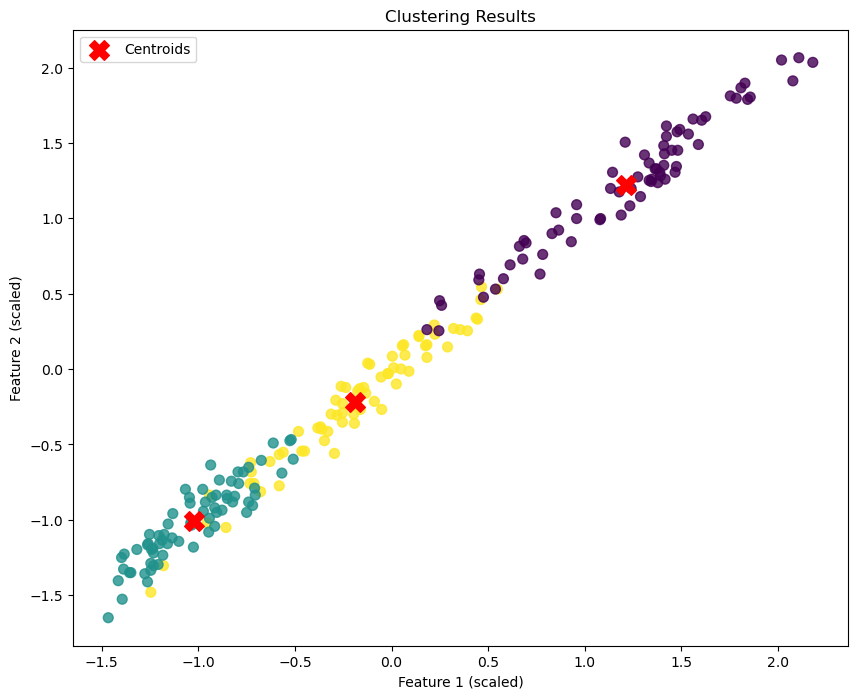

In [29]:
# TODO: Plot clustering results
plt.figure(figsize=(10, 8))

# Plot the data points with their assigned clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

# Plot the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

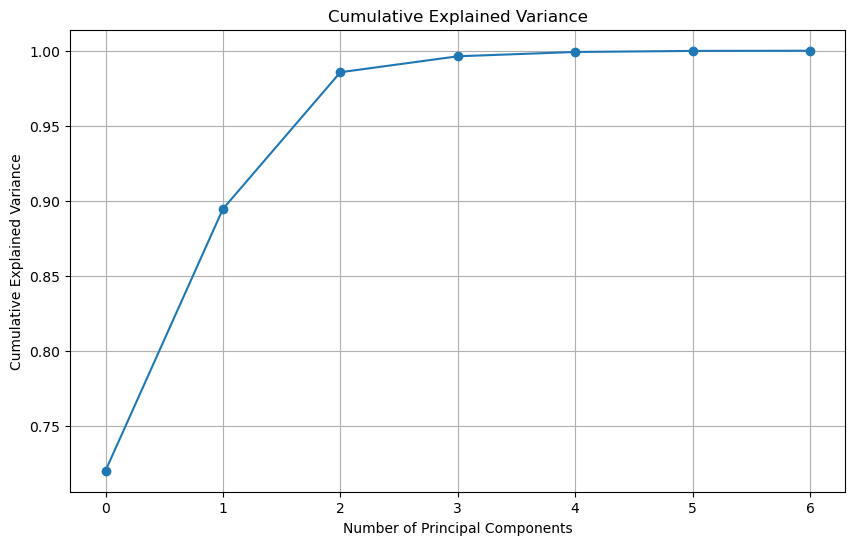

Number of Principal Components to explain 95.0% variance: 3


In [30]:
# TODO: Find the number of principal components using explained variance ratio
# Initialize the PCA
pca = PCA()

# Fit the PCA on the scaled training data
pca.fit(X_train_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine the number of principal components that explain a certain percentage of variance
target_explained_variance = 0.95  
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= target_explained_variance) + 1

print(f"Number of Principal Components to explain {target_explained_variance * 100}% variance: {num_components}")

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [31]:
# TODO: Use PCA to transform the data
# Use PCA with the specified number of principal components
pca = PCA(n_components=num_components)

# Fit and transform the PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)

# Display the shape of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (168, 3)
Shape of X_test_pca: (42, 3)


In [32]:
# TODO: Implement K-means with the transformed data
# Instantiate KMeans with the optimal number of clusters
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit KMeans to the transformed training data
cluster_labels_pca = kmeans_pca.fit_predict(X_train_pca)

# Transform the test data using the same PCA object and predict clusters
cluster_labels_test_pca = kmeans_pca.predict(X_test_pca)

# Print the cluster labels for the first few data points for verification
print("Cluster Labels for Training Data:")
print(cluster_labels_pca[:10])

print("Cluster Labels for Test Data:")
print(cluster_labels_test_pca[:10])

Cluster Labels for Training Data:
[2 1 2 0 2 1 1 0 0 2]
Cluster Labels for Test Data:
[0 2 1 0 2 2 0 2 0 2]


In [33]:
# TODO: Calculate the three different validation metrics
# Calculate Silhouette score
silhouette_avg_pca = silhouette_score(X_train_pca, cluster_labels_pca)
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

# Calculate Calinski-Harabasz score
calinski_harabasz_avg_pca = calinski_harabasz_score(X_train_pca, cluster_labels_pca)
print(f"Calinski-Harabasz Score (PCA): {calinski_harabasz_avg_pca}")

# Calculate Davies-Bouldin score
davies_bouldin_avg_pca = davies_bouldin_score(X_train_pca, cluster_labels_pca)
print(f"Davies-Bouldin Score (PCA): {davies_bouldin_avg_pca}")

Silhouette Score (PCA): 0.4123575924188413
Calinski-Harabasz Score (PCA): 208.19673632971117
Davies-Bouldin Score (PCA): 0.8790957939272102


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

Validation Metrics:
Silhouette Score (PCA): 0.4123575924188413
Calinski-Harabasz Score (PCA): 208.19673632971117
Davies-Bouldin Score (PCA): 0.8790957939272102


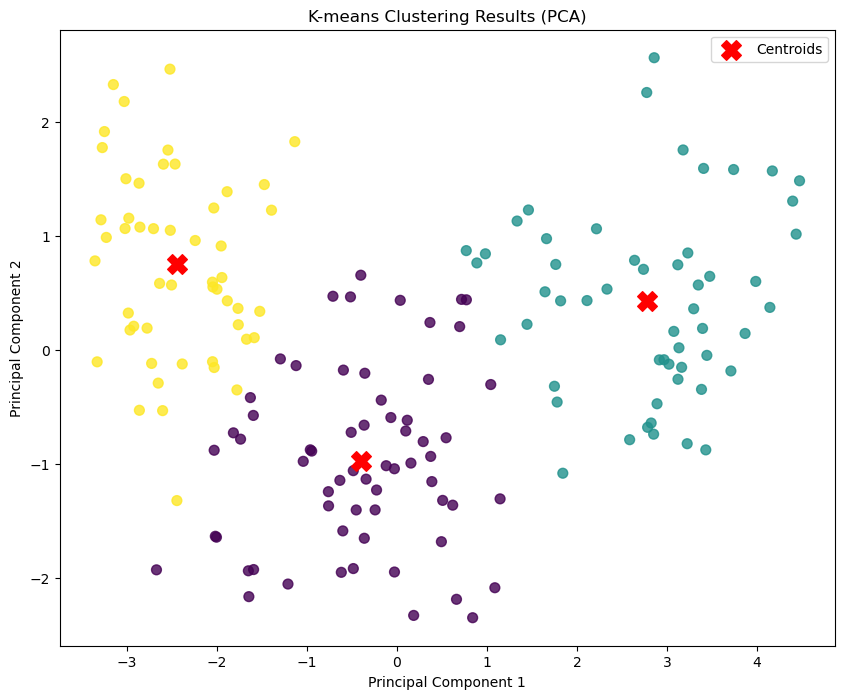

In [34]:
# TODO: Display results
print("Validation Metrics:")
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")
print(f"Calinski-Harabasz Score (PCA): {calinski_harabasz_avg_pca}")
print(f"Davies-Bouldin Score (PCA): {davies_bouldin_avg_pca}")

# TODO: Plot clustering results
plt.figure(figsize=(10, 8))

# Plot the clustered data points with their assigned clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels_pca, cmap='viridis', s=50, alpha=0.8)

# Plot the centroids of each cluster
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. Yes the optimal number makes sense based on the context.
2. No we did not get similiar results, the PCA was in different places.
3. Using 3 components for PCA suggests that you retained enough information to explain 95% of the variance in the data. 

Advantages:

Dimensionality Reduction: Reducing to 3 components can simplify the model and visualization.
Speed: Training models on fewer features may be faster.
Considerations:

Information Loss: PCA involves trade-offs; while it reduces dimensionality, there is some loss of information.
Interpretability: Interpreting results based on principal components might be less intuitive than interpreting based on original features.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


*DESCRIBE YOUR PROCESS HERE*
1. I looked at lectures, labs, and previous assignments to help make the code.
2. I tackled the assignment step by step, starting with loading and exploring the dataset, separating features and targets, splitting the data, scaling, applying PCA, and performing K-means clustering.
3. I did not use generative AI.
4. I did not see a lot of challenge in this part of the assignment.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I liked using the three validation method to compare those methods. I found finding the optimal k challenging, but ended up using 3 as the optimal k.